# Implementación de KMeans con Scikit-learn

Este notebook implementa paso a paso el algoritmo **KMeans** de agrupamiento (clustering) utilizando `scikit-learn`, una de las bibliotecas más populares para machine learning en Python.

---

## ¿Qué es KMeans?

KMeans es un algoritmo de aprendizaje no supervisado que permite agrupar un conjunto de datos en **K grupos** o **clusters**. Es particularmente útil cuando no se tienen etiquetas y se desea descubrir estructuras en los datos.

### Pasos generales del algoritmo:

1. Elegir aleatoriamente `k` centroides iniciales.
2. Asignar cada punto de datos al centroide más cercano (usualmente usando la distancia euclidiana).
3. Recalcular los centroides como el promedio de los puntos asignados a cada grupo.
4. Repetir los pasos 2 y 3 hasta que los centroides no cambien significativamente (convergencia).

El objetivo es **minimizar la suma de distancias cuadradas dentro de cada grupo**, también conocido como **inertia**.

---


---

## Parámetros relevantes en `make_blobs`

Cuando generamos datos sintéticos para probar algoritmos de agrupamiento, `make_blobs` nos permite controlar la distribución de los puntos mediante varios parámetros. A continuación se explican dos de ellos en profundidad:

### `cluster_std=0.60`

Este parámetro indica la **desviación estándar** de cada grupo o cluster. Afecta directamente la **dispersión o compactación** de los puntos dentro de un mismo grupo.

- Si `cluster_std` es pequeño (por ejemplo, 0.2), los puntos estarán **más cercanos** al centroide del grupo → grupos más **compactos**.
- Si `cluster_std` es grande (por ejemplo, 1.5), los puntos estarán **más dispersos**, y puede que los grupos se **solapen** → lo que dificulta más el trabajo de un algoritmo de clustering.

En este notebook usamos `cluster_std=0.60`, lo cual genera una separación moderada entre los grupos.

### `random_state=42`

Este parámetro se usa tanto en `make_blobs` como en el modelo `KMeans`.

Su función es **garantizar la reproducibilidad de los resultados**. Al usar un número fijo (`42`, en este caso), se asegura que:

- Los mismos puntos serán generados cada vez que se ejecute `make_blobs`.
- La inicialización de los centroides en KMeans será consistente.

Esto es crucial para mantener resultados consistentes en experimentos, debugging y documentación académica.

---


In [1]:
# ============================
# Importación de librerías
# ============================

# numpy: biblioteca fundamental para operaciones numéricas y manejo de vectores/arreglos
import numpy as np

# matplotlib.pyplot: se usa para graficar y visualizar datos en 2D
import matplotlib.pyplot as plt

# make_blobs: genera datos sintéticos con estructura de clusters, útil para pruebas de algoritmos de clustering
from sklearn.datasets import make_blobs

# KMeans: clase que implementa el algoritmo de clustering K-means en Scikit-learn
from sklearn.cluster import KMeans


In [3]:
# ========================================
# Generación del conjunto de datos sintético
# ========================================

# make_blobs genera:
# - n_samples=300: 300 puntos de datos
# - centers=4: 4 grupos (clusters)
# - cluster_std=0.60: dispersión de cada cluster
# - random_state=42: asegura reproducibilidad

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# X: matriz de datos de tamaño (300, 2), contiene las coordenadas de los puntos
# y_true: etiquetas verdaderas de los clusters, solo para referencia (no se usan en KMeans)

print("Forma del conjunto de datos:", X.shape)


Forma del conjunto de datos: (300, 2)


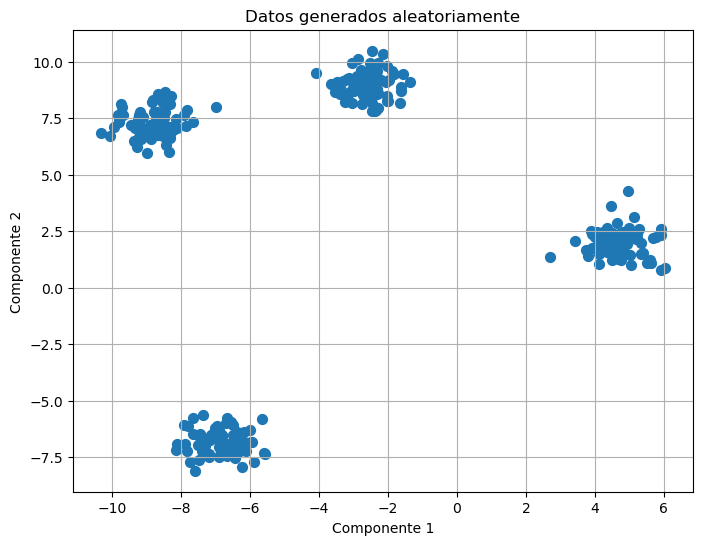

In [5]:
# ===========================
# Visualización del conjunto de datos
# ===========================

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos generados aleatoriamente")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()


In [7]:
# =============================
# Aplicación del algoritmo KMeans
# =============================

# Se crea el modelo de KMeans:
# - n_clusters=4: número de clusters que se desea encontrar
# - random_state=42: para hacer el resultado reproducible

kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustamos el modelo con los datos X
kmeans.fit(X)

# Obtenemos las etiquetas predichas para cada punto
y_kmeans = kmeans.predict(X)

# Obtenemos las coordenadas de los centroides encontrados
centroids = kmeans.cluster_centers_


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


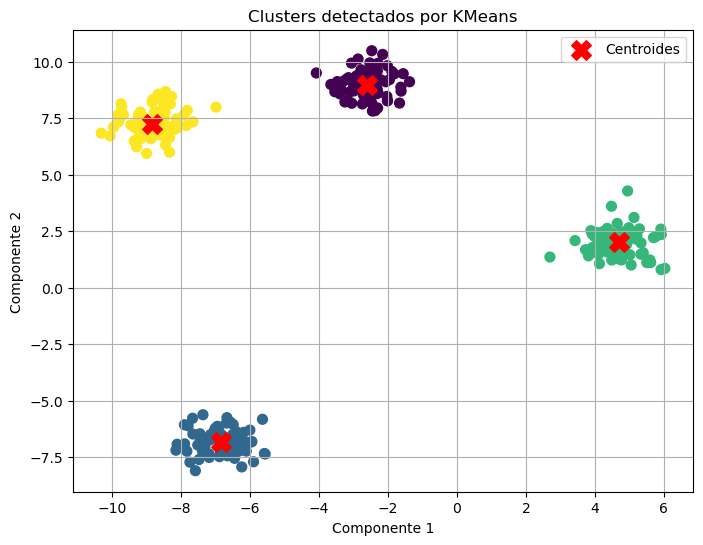

In [9]:
# =============================
# Visualización de clusters y centroides
# =============================

plt.figure(figsize=(8, 6))

# Mostramos los puntos, coloreados según el cluster asignado
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Mostramos los centroides con una estrella roja
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title("Clusters detectados por KMeans")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.grid(True)
plt.show()


## Descripción de variables y parámetros

| Variable     | Descripción                                                                 |
|--------------|------------------------------------------------------------------------------|
| `X`          | Datos generados aleatoriamente: matriz de 300×2 (puntos en 2D)              |
| `y_true`     | Etiquetas reales (solo para evaluación, no se usan en KMeans)               |
| `kmeans`     | Objeto del modelo KMeans configurado con 4 clusters                          |
| `y_kmeans`   | Etiquetas de clusters asignadas por el modelo a cada punto                  |
| `centroids`  | Coordenadas de los 4 centroides finales calculados por KMeans               |
